### Problem Statement: 
The dataset is related to the marketing campaigns of a Portuguese banking institution.The classification goal is to predict whether the client will subscribe to a term deposit (variable y: 1/0).

In [5]:
import numpy as np
import pandas as pd

In [6]:
data = pd.read_csv('bank-full.csv', header=0, sep=';')
data = data.dropna()
print(data.shape)
print(list(data.columns))

(45211, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


### Input variables
1. age (numeric)
2. job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
3. marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
4. education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
5. default: has credit in default? (categorical: “no”, “yes”, “unknown”)
6. housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
7. loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
8. contact: contact communication type (categorical: “cellular”, “telephone”)
9. month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
10. day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
16. emp.var.rate: employment variation rate — (numeric)
17. cons.price.idx: consumer price index — (numeric)
18. cons.conf.idx: consumer confidence index — (numeric)
19. euribor3m: euribor 3 month rate — (numeric)
20. nr.employed: number of employees — (numeric)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

### Data Profiling

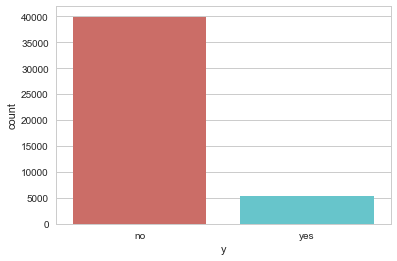

In [8]:
# Barplot for the dependent variable
sns.countplot(x='y',data=data, palette='hls')
plt.show()

In [9]:
# Check the missing values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

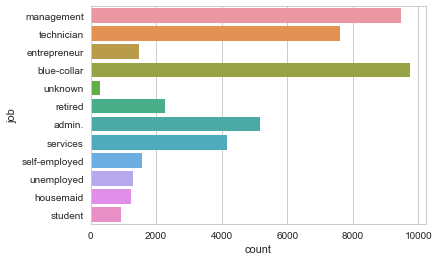

In [10]:
# Customer job distribution
sns.countplot(y="job", data=data)
plt.show()

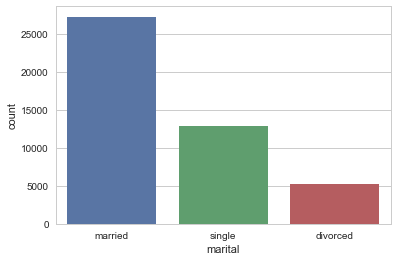

In [11]:
# Customer marital status distribution
sns.countplot(x="marital", data=data)
plt.show()

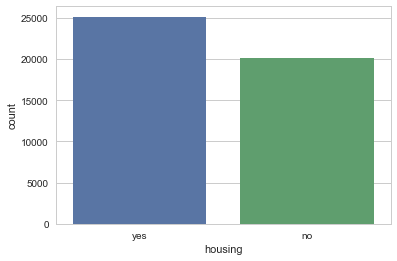

In [21]:
# Barplot for housing loan
sns.countplot(x="housing", data=data)
plt.show()

### Feature selection

Our prediction will be based on the customer’s job, marital status, whether he(she) has credit in default, whether he(she) has a housing loan, whether he(she) has a personal loan, and the outcome of the previous marketing campaigns. So, we will drop the variables that we do not need.

In [22]:
data = data[['job','marital','default','housing','loan','poutcome','y']]

In [23]:
data2 = pd.get_dummies(data, columns =['job', 'marital', 'default', 'housing','loan', 'poutcome'])
data2.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

### Model training

In [24]:
from sklearn.model_selection import train_test_split
X = data2.iloc[:,1:]
y = data2.iloc[:,0]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

In [25]:
# Check out training data is sufficient
X_train.shape
X_test.shape

(11303, 25)

In [26]:
from sklearn.linear_model import LogisticRegression

# Fit logistic regression to the training set
classifier = LogisticRegression(solver='lbfgs', C=1)
classifier.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

### Predicting the test set results and creating confusion matrix

In [27]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

TN = confusion_matrix[0,0]
FP = confusion_matrix[0,1]
FN = confusion_matrix[1,0]
TP = confusion_matrix[1,1]

print('TN: {}, FP: {}, FN: {}, TP: {}'.format(TN, FP, FN, TP))

precision = TP / (FP + TP) 
recall = TP / (TP + FN)

print('Precision: {:2.2}, Recall: {:2.2}'.format(precision,recall))

[[9852  126]
 [1107  218]]
TN: 9852, FP: 126, FN: 1107, TP: 218
Precision: 0.63, Recall: 0.16


In [28]:
# Accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89
